In [75]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import gc
import math

from utilities.data import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN

loader = DataLoader()
#grenade_df = loader.load_grenade_df(nrows=20000)
#print(grenade_df.info())
#print(grenade_df.isnull().sum())
#kill_df = loader.load_kill_df()
#print(kills_df.info())
#dmg_df = loader.load_dmg_df(nrows=20000)
#dmg_df = dmg_df[(~dmg_df['seconds'].isna())]
#print(dmg_df.info())
#print(dmg_df.isnull().sum())
cluster_df = loader.load_firefight_df(nrows=500_000)
print(cluster_df.info())
cluster_df = cluster_df[cluster_df['att_side'] != 'None']
print(cluster_df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314270 entries, 0 to 314269
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   winner_side  314270 non-null  object 
 1   att_side     314270 non-null  object 
 2   map          314270 non-null  object 
 3   seconds      314270 non-null  float64
 4   pos_x        314270 non-null  float64
 5   pos_y        314270 non-null  float64
 6   hp_dmg       314270 non-null  int64  
 7   pos_type     314270 non-null  object 
 8   index        314270 non-null  int64  
 9   file_round   314270 non-null  object 
dtypes: float64(3), int64(2), object(5)
memory usage: 24.0+ MB
None
winner_side    0
att_side       0
map            0
seconds        0
pos_x          0
pos_y          0
hp_dmg         0
pos_type       0
index          0
file_round     0
dtype: int64
['CounterTerrorist' 'Terrorist']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 311922 entries, 0 to 314265
Data column

In [3]:
# Larger eps = bigger clusters
cluster_df = cluster_firefights(cluster_df, eps=0.09, min_samples=6, n_seconds_equiv_to_quarter_map=20, verbose=True)
print(cluster_df.head(5))

esea_match_13770997.dem_1: [0 1]
esea_match_13770997.dem_10: [-1  0]
esea_match_13770997.dem_11: [-1]
esea_match_13770997.dem_12: [-1  0]
esea_match_13770997.dem_13: [-1]
esea_match_13770997.dem_14: [-1]
esea_match_13770997.dem_15: [-1]
esea_match_13770997.dem_17: [-1]
esea_match_13770997.dem_18: [-1]
esea_match_13770997.dem_19: [-1]
esea_match_13770997.dem_2: [-1]
esea_match_13770997.dem_20: [-1]
esea_match_13770997.dem_21: [-1]
esea_match_13770997.dem_22: [-1  0]
esea_match_13770997.dem_23: [-1]
esea_match_13770997.dem_24: [-1  0]
esea_match_13770997.dem_25: [-1]
esea_match_13770997.dem_3: [-1]
esea_match_13770997.dem_4: [-1  0  1  2  3]
esea_match_13770997.dem_5: [-1]
esea_match_13770997.dem_6: [-1]
esea_match_13770997.dem_7: [-1]
esea_match_13770997.dem_8: [-1]
esea_match_13770997.dem_9: [-1]
esea_match_13779704.dem_1: [-1]
esea_match_13779704.dem_10: [-1]
esea_match_13779704.dem_11: [-1  0]
esea_match_13779704.dem_12: [-1  0  1]
esea_match_13779704.dem_13: [-1]
esea_match_13779704

esea_match_13779786.dem_14: [-1  0  1]
esea_match_13779786.dem_15: [-1]
esea_match_13779786.dem_16: [-1  0]
esea_match_13779786.dem_17: [-1  0]
esea_match_13779786.dem_18: [-1]
esea_match_13779786.dem_19: [-1  0]
esea_match_13779786.dem_2: [-1]
esea_match_13779786.dem_20: [-1]
esea_match_13779786.dem_21: [-1  0  1]
esea_match_13779786.dem_22: [-1  0  1  2]
esea_match_13779786.dem_23: [-1]
esea_match_13779786.dem_24: [-1  0  1  2]
esea_match_13779786.dem_25: [-1]
esea_match_13779786.dem_26: [-1  0]
esea_match_13779786.dem_27: [-1  0  1]
esea_match_13779786.dem_28: [-1  0  1]
esea_match_13779786.dem_29: [-1]
esea_match_13779786.dem_3: [-1  0]
esea_match_13779786.dem_4: [-1]
esea_match_13779786.dem_5: [-1]
esea_match_13779786.dem_6: [-1]
esea_match_13779786.dem_7: [-1]
esea_match_13779786.dem_8: [-1]
esea_match_13779786.dem_9: [-1  0]
esea_match_13779787.dem_1: [-1  0]
esea_match_13779787.dem_10: [-1  0  1]
esea_match_13779787.dem_11: [-1  0]
esea_match_13779787.dem_12: [-1  0  1]
esea_ma

esea_match_13779805.dem_29: [-1  0]
esea_match_13779805.dem_3: [-1]
esea_match_13779805.dem_30: [-1]
esea_match_13779805.dem_4: [-1]
esea_match_13779805.dem_5: [-1]
esea_match_13779805.dem_6: [-1]
esea_match_13779805.dem_7: [-1  0  1]
esea_match_13779805.dem_8: [-1]
esea_match_13779805.dem_9: [-1  0  1  2]
esea_match_13779806.dem_1: [-1]
esea_match_13779806.dem_10: [-1  0]
esea_match_13779806.dem_11: [-1]
esea_match_13779806.dem_12: [-1  0]
esea_match_13779806.dem_13: [-1]
esea_match_13779806.dem_14: [-1]
esea_match_13779806.dem_15: [-1  0]
esea_match_13779806.dem_16: [-1]
esea_match_13779806.dem_17: [-1]
esea_match_13779806.dem_18: [-1  0]
esea_match_13779806.dem_19: [-1  0]
esea_match_13779806.dem_2: [-1]
esea_match_13779806.dem_20: [-1]
esea_match_13779806.dem_21: [-1]
esea_match_13779806.dem_22: [-1  0]
esea_match_13779806.dem_23: [-1  0  1]
esea_match_13779806.dem_24: [-1  0  1  2  3]
esea_match_13779806.dem_25: [-1]
esea_match_13779806.dem_26: [-1  0]
esea_match_13779806.dem_3: [

esea_match_13779824.dem_27: [-1]
esea_match_13779824.dem_3: [-1]
esea_match_13779824.dem_4: [-1]
esea_match_13779824.dem_5: [-1]
esea_match_13779824.dem_6: [-1]
esea_match_13779824.dem_7: [-1]
esea_match_13779824.dem_8: [-1]
esea_match_13779824.dem_9: [-1]
esea_match_13779825.dem_1: [-1]
esea_match_13779825.dem_10: [-1]
esea_match_13779825.dem_11: [-1]
esea_match_13779825.dem_12: [-1]
esea_match_13779825.dem_13: [-1]
esea_match_13779825.dem_14: [-1]
esea_match_13779825.dem_15: [-1]
esea_match_13779825.dem_16: [-1  0]
esea_match_13779825.dem_17: [-1]
esea_match_13779825.dem_18: [-1]
esea_match_13779825.dem_19: [-1]
esea_match_13779825.dem_2: [-1]
esea_match_13779825.dem_20: [-1]
esea_match_13779825.dem_21: [-1]
esea_match_13779825.dem_22: [-1]
esea_match_13779825.dem_23: [-1]
esea_match_13779825.dem_24: [-1]
esea_match_13779825.dem_25: [-1]
esea_match_13779825.dem_26: [-1]
esea_match_13779825.dem_3: [-1]
esea_match_13779825.dem_4: [-1]
esea_match_13779825.dem_5: [-1]
esea_match_13779825

esea_match_13779837.dem_19: [-1  0]
esea_match_13779837.dem_2: [-1]
esea_match_13779837.dem_20: [-1  0]
esea_match_13779837.dem_21: [-1]
esea_match_13779837.dem_22: [-1]
esea_match_13779837.dem_23: [-1]
esea_match_13779837.dem_24: [-1  0]
esea_match_13779837.dem_25: [-1  0]
esea_match_13779837.dem_26: [-1]
esea_match_13779837.dem_27: [-1  0  1]
esea_match_13779837.dem_28: [-1]
esea_match_13779837.dem_29: [-1  0  1]
esea_match_13779837.dem_3: [-1]
esea_match_13779837.dem_30: [-1]
esea_match_13779837.dem_31: [-1]
esea_match_13779837.dem_32: [-1  0  1]
esea_match_13779837.dem_33: [-1]
esea_match_13779837.dem_34: [-1  0]
esea_match_13779837.dem_35: [-1]
esea_match_13779837.dem_36: [-1  0]
esea_match_13779837.dem_37: [-1  0]
esea_match_13779837.dem_38: [-1  0]
esea_match_13779837.dem_39: [-1  0]
esea_match_13779837.dem_4: [-1]
esea_match_13779837.dem_40: [-1]
esea_match_13779837.dem_41: [-1  0]
esea_match_13779837.dem_42: [-1  0]
esea_match_13779837.dem_43: [-1  0]
esea_match_13779837.dem_4

esea_match_13779850.dem_4: [-1]
esea_match_13779850.dem_40: [-1  0]
esea_match_13779850.dem_41: [-1]
esea_match_13779850.dem_42: [-1  0]
esea_match_13779850.dem_5: [-1]
esea_match_13779850.dem_6: [-1]
esea_match_13779850.dem_7: [-1]
esea_match_13779850.dem_8: [-1]
esea_match_13779850.dem_9: [-1]
esea_match_13779851.dem_10: [-1]
esea_match_13779851.dem_11: [-1]
esea_match_13779851.dem_12: [-1]
esea_match_13779851.dem_13: [-1]
esea_match_13779851.dem_14: [-1  0]
esea_match_13779851.dem_15: [-1]
esea_match_13779851.dem_16: [-1  0]
esea_match_13779851.dem_17: [-1  0]
esea_match_13779851.dem_18: [-1]
esea_match_13779851.dem_19: [-1]
esea_match_13779851.dem_2: [-1]
esea_match_13779851.dem_20: [-1]
esea_match_13779851.dem_21: [-1]
esea_match_13779851.dem_22: [-1]
esea_match_13779851.dem_23: [-1]
esea_match_13779851.dem_24: [-1]
esea_match_13779851.dem_25: [-1]
esea_match_13779851.dem_26: [-1]
esea_match_13779851.dem_27: [-1]
esea_match_13779851.dem_28: [-1]
esea_match_13779851.dem_29: [-1]
es

In [4]:
# Cluster spatially

pos_type_eps = {'DMG_ATT': 0.004, 
                'DMG_VIC': 0.003, 
                'Smoke': 0.0045, 
                'Flash': 0.005, 
                'HE': 0.004, 
                'Incendiary': 0.008, 
                'Molotov': 0.008}
cluster_df = cluster_positions(cluster_df, eps_map=pos_type_eps, verbose=True)
print(cluster_df.isna().sum())

DMG_ATT CounterTerrorist
CounterTerrorist, DMG_ATT: (array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49,
       50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66,
       67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83,
       84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95]), array([783,   6,   5,   4,   6,   5,   4,   5,   6,   5,   4,   4,   4,
         5,   7,   4,  15,   6,   5,   4,   4,   5,   6,   4,   6,   8,
         6,   5,   4,   4,   4,   5,   7,   4,   4,   5,   4,   4,   4,
         5,   4,   4,   4,   9,   4,   4,   7,   5,   7,  11,   4,   4,
         7,   4,   5,   4,   4,   5,   4,   5,   5,   4,   5,   7,   4,
         5,   4,   4,   4,   5,   4,   4,   4,   8,   4,   4,   6,   4,
         5,   4,   4,   4,   5,   4,   4,   4,   4,   4,   4,   9,   4,
         5,

CounterTerrorist, Smoke: (array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]), array([1007,   27,   21,   37,    6,  253,  312,  165,   23,    4,  131,
        132,    6,   54,   11,    8,   20,    5,   25,    4,    9,   10,
          4,    4,   16,    4,    4,    5,    4,    9,    4,    4,   36,
         33,    9,    9,    7,    5,    5,    5,    8,    7,    5,    8,
          3,    8,    4,    4,    9]))
Smoke Terrorist
Terrorist, Smoke: (array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49,
       50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62]), array([1292,    8,    7,  114,  104,   32,  108,    8,    4,   15,   15,
         10,   10,    5,   25,

In [5]:
display_df = cluster_df.copy()

POS CLUSTERS: [-1.  1.  2.  3.  4.  5.  6. 10. 11. 14. 40. 79.]
FIREFIGHT CLUSTERS: [-1.  0.  1.  2.  3.  4.]
644       5.0
645       4.0
646      14.0
647      14.0
648      14.0
         ... 
19882    -1.0
19883     4.0
19884     2.0
19885    -1.0
19886    -1.0
Name: pos_cluster, Length: 70, dtype: float64


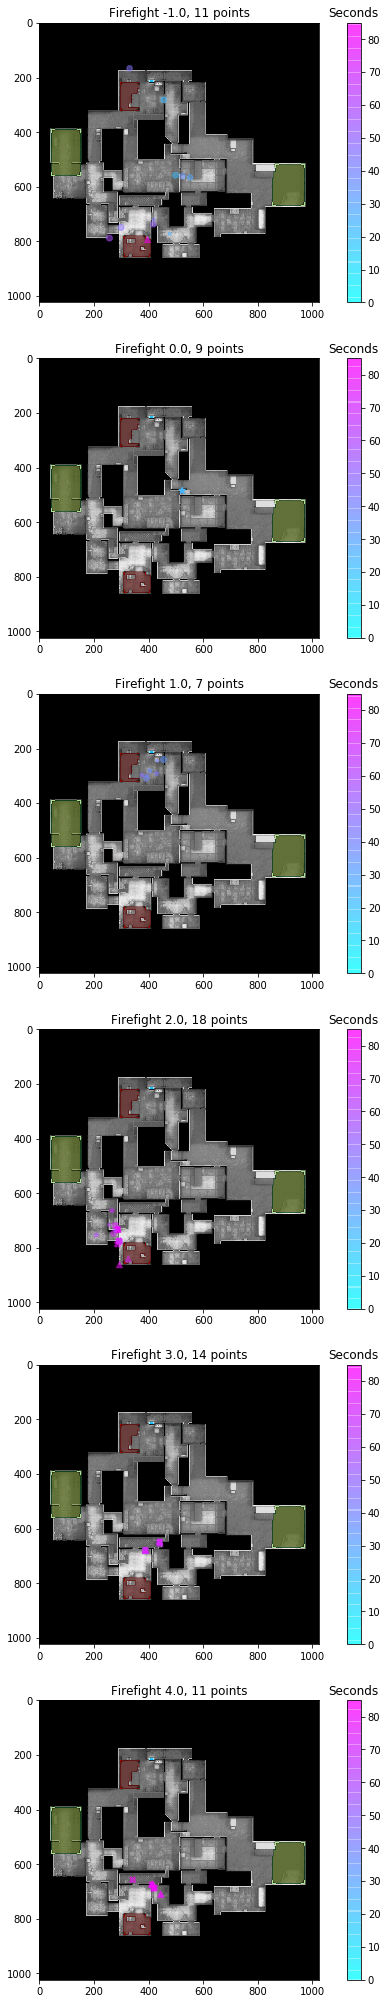

In [6]:
import matplotlib as mpl

map_filenames = {map_name: f'../data/{map_name}.png' for map_name in cluster_df['map'].unique()}
def visualize_ff_clusters(cluster_df, file_round):
    df = cluster_df[cluster_df['file_round'] == file_round]
    print(f"POS CLUSTERS: {np.unique(df['pos_cluster'])}")
    print(f"FIREFIGHT CLUSTERS: {np.unique(df['firefight_cluster'])}")
    print(df['pos_cluster'])
    num_pos_clusters = len(np.unique(df['pos_cluster']))
    num_ff_clusters = len(np.unique(df['firefight_cluster']))
    fig, axes = plt.subplots(num_ff_clusters, figsize=(10,36))
    #for i, pos_cluster in enumerate(np.unique(df['pos_cluster'])):
    #    axes[i, 0].set_title(f'Cluster {i}')
    #    pts = df[df['pos_cluster'] == pos_cluster]
    #    map_name = pts.iloc[0]['map']
    #    im = plt.imread(map_filenames[map_name])
    #    axes[i, 0].imshow(im)
    #    axes[i, 0].scatter(pts['pos_x'], pts['pos_y'], c=pts['seconds'])
    norm = mpl.colors.Normalize(vmin=0, vmax=max(df['seconds']))
    cmap = mpl.cm.cool
    for i, firefight_cluster in enumerate(np.unique(df['firefight_cluster'])):
        pts = df[df['firefight_cluster'] == firefight_cluster]
        axes[i].set_title(f'Firefight {firefight_cluster}, {len(pts)} points')
        map_name = pts.iloc[0]['map']
        im = plt.imread(map_filenames[map_name])
        axes[i].imshow(im)
        markers = {'DMG_ATT': '^', 'DMG_VIC': 'X', 'Smoke': 'o', 'HE': 'H', 'Flash': '.', 'Molotov': '*', 'Incendiary': '*', }
        for pt_type, marker in markers.items():
            pts_type = pts[pts['pos_type'] == pt_type]
            sct = axes[i].scatter(pts_type['pos_x'], pts_type['pos_y'], c=pts_type['seconds'], marker=marker, cmap='cool', norm=norm, alpha=0.8)
        cb = plt.colorbar(sct, ax=axes[i])
        cb.ax.set_title('Seconds')
    plt.show()
visualize_ff_clusters(display_df, 'esea_match_13779704.dem_26')

POS CLUSTERS: [-1.  1.  3.  4.  5.  7. 10. 12. 14.]
FIREFIGHT CLUSTERS: [-1.  0.]
563     5.0
564     1.0
565     7.0
566    -1.0
567    10.0
568    10.0
569    10.0
570    10.0
571    10.0
572    10.0
573    -1.0
574    -1.0
575     4.0
576     4.0
577    -1.0
578     5.0
579    14.0
580     7.0
581    -1.0
582     3.0
583     3.0
584    -1.0
585    -1.0
586    -1.0
587    -1.0
588    -1.0
589    -1.0
590    -1.0
591    12.0
592    12.0
593    12.0
594    12.0
595    12.0
Name: pos_cluster, dtype: float64


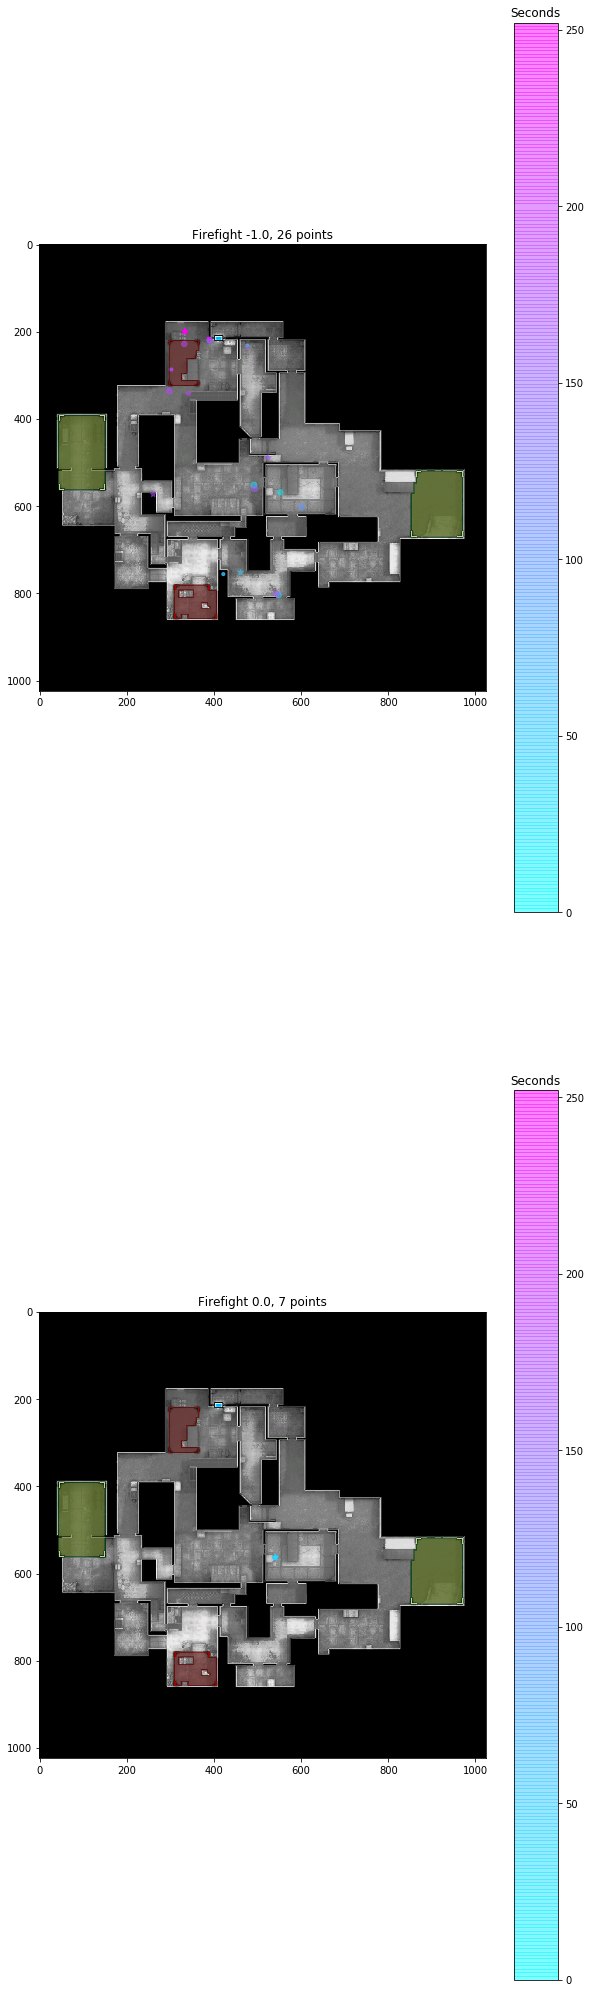

In [8]:
visualize_ff_clusters(display_df, 'esea_match_13779704.dem_21')

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in sqrt
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in sqrt
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in sqrt
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in sqrt
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in sqrt
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in sqrt
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in sqrt
/home/ec2-use

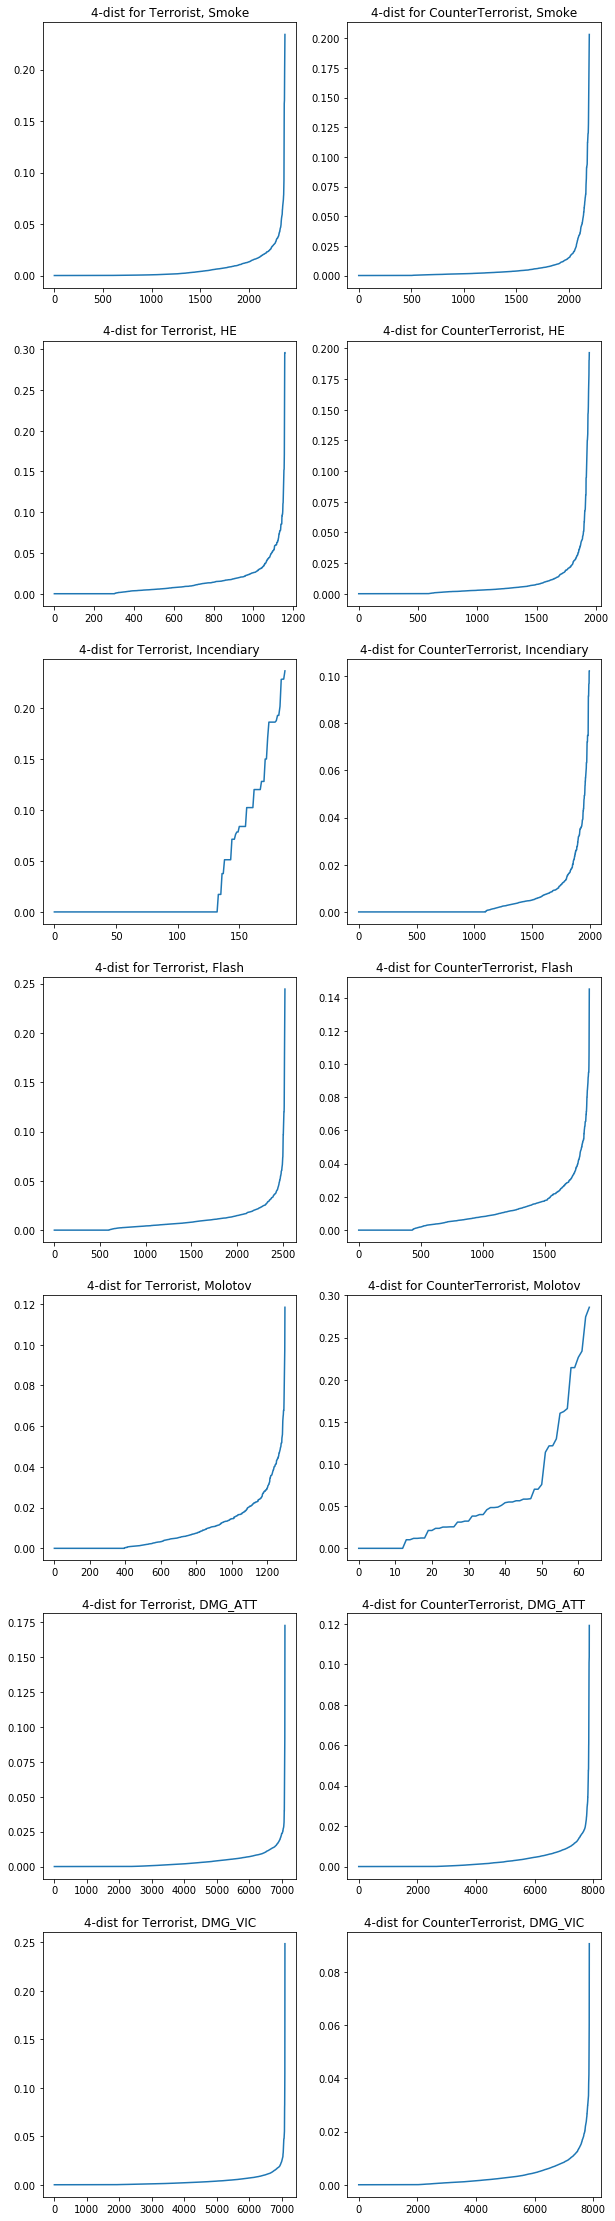

In [44]:
# https://www.aaai.org/Papers/KDD/1996/KDD96-037.pdf
def k_distances2(x, k):
    dim0 = x.shape[0]
    dim1 = x.shape[1]
    p=-2*x.dot(x.T)+np.sum(x**2, axis=1).T+ np.repeat(np.sum(x**2, axis=1),dim0,axis=0).reshape(dim0,dim0)
    p = np.sqrt(p)
    p.sort(axis=1)
    p=p[:,:k]
    pm= p.flatten()
    pm= np.sort(pm)
    return p, pm


def visualize_k_distance(cluster_df, map_name):
    cluster_df = cluster_df[cluster_df['map'] == map_name]
    teams = ['Terrorist', 'CounterTerrorist']
    pos_types = cluster_df['pos_type'].unique()
    map_filenames = {map_name: f'../data/{map_name}.png' for map_name in grenade_df['map'].unique()}
    fig, axes = plt.subplots(len(pos_types), len(teams), figsize=(10,40))

    for i, team in enumerate(teams):
        for j, pos_type in enumerate(pos_types):
            df = cluster_df[(cluster_df['att_side'] == team) & (cluster_df['pos_type'] == pos_type)]
            p, pm = k_distances2(df[['pos_x', 'pos_y']].values, 4)
            axes[j, i].plot(pm)
            axes[j, i].set_title(f'4-dist for {team}, {pos_type}')
            #axes[j, i].ylabel('n');
            #axes[j, i].xlabel('Epsilon distance');
            
    plt.show()
visualize_k_distance(cluster_df, 'de_mirage')

ValueError: Found array with 0 sample(s) (shape=(0, 2)) while a minimum of 1 is required.

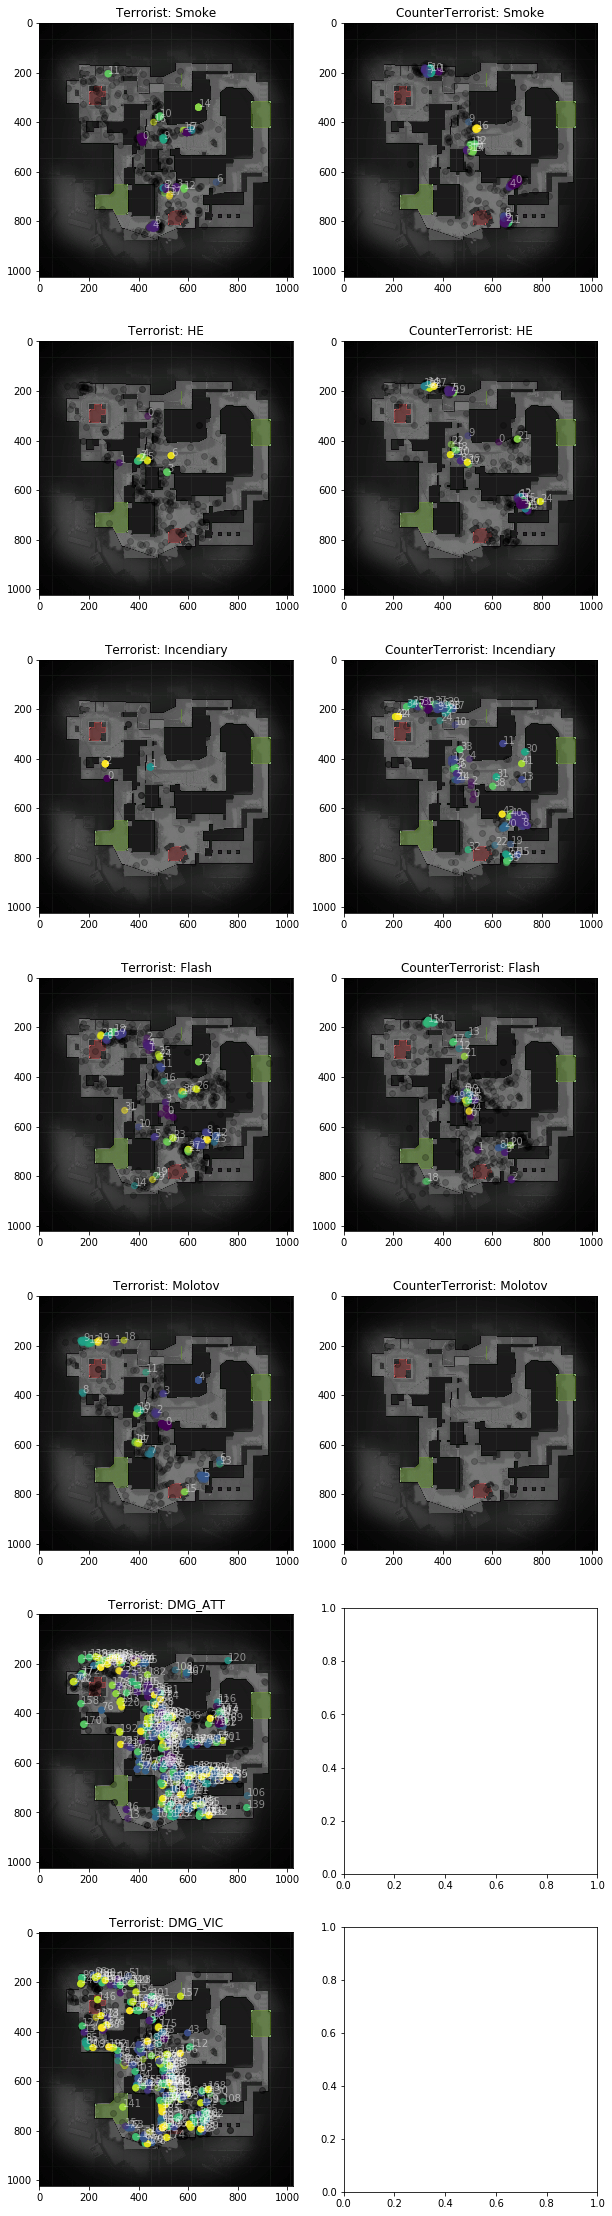

In [45]:
from sklearn.neighbors.nearest_centroid import NearestCentroid

def visualize_pos_clusters(cluster_df, map_name):
    cluster_df = cluster_df[cluster_df['map'] == map_name]
    teams = ['Terrorist', 'CounterTerrorist']
    pos_types = cluster_df['pos_type'].unique()
    map_filenames = {map_name: f'../data/{map_name}.png' for map_name in grenade_df['map'].unique()}
    fig, axes = plt.subplots(len(pos_types), len(teams), figsize=(10,40))

    for i, team in enumerate(teams):
        for j, pos_type in enumerate(pos_types):
            df = cluster_df[(cluster_df['att_side'] == team) & (cluster_df['pos_type'] == pos_type)]            
            axes[j, i].set_title(f'{team}: {pos_type}')
            im = plt.imread(map_filenames[map_name])
            axes[j, i].imshow(im)
            not_clustered = df[df['pos_cluster'] == -1]
            axes[j, i].scatter(not_clustered['pos_x'], not_clustered['pos_y'], c='black', alpha=0.2)
            df = df[df['pos_cluster'] != -1]
            axes[j, i].scatter(df['pos_x'], df['pos_y'], c=df['pos_cluster'], alpha=0.5)
            
            centroids = NearestCentroid()
            pts = pd.concat([df['pos_x'], df['pos_y']], axis=1)
            centroids.fit(pts, df['pos_cluster'].astype('int'))    
            nade_clusters = centroids.centroids_
            for k, pos in enumerate(zip(nade_clusters[:, 0], nade_clusters[:, 1])):
                axes[j, i].annotate(str(k), pos, color='white', fontsize=10, alpha=0.5)
    plt.show()
visualize_pos_clusters(display_df, 'de_mirage')

For eps = 0.003 The average silhouette_score is : -0.16847085546707097
Average silhouette score without cluster -1 is:  0.6139048045393198
For eps = 0.0035 The average silhouette_score is : -0.06419329554826789
Average silhouette score without cluster -1 is:  0.5924138043683209
For eps = 0.004 The average silhouette_score is : -0.011950342603145231
Average silhouette score without cluster -1 is:  0.5680424271038758
For eps = 0.0045000000000000005 The average silhouette_score is : 0.042831243886224314
Average silhouette score without cluster -1 is:  0.5369419128049792
For eps = 0.005 The average silhouette_score is : 0.07648569526937396
Average silhouette score without cluster -1 is:  0.4981387666890973
For eps = 0.0055 The average silhouette_score is : 0.12554335105887013
Average silhouette score without cluster -1 is:  0.4912558738324773
For eps = 0.006 The average silhouette_score is : 0.10402094904833323
Average silhouette score without cluster -1 is:  0.401208912094545
For eps = 0.

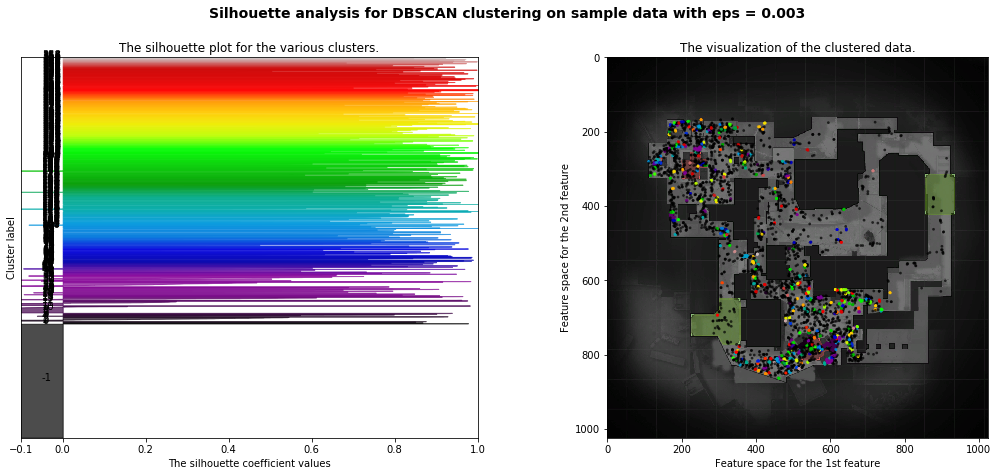

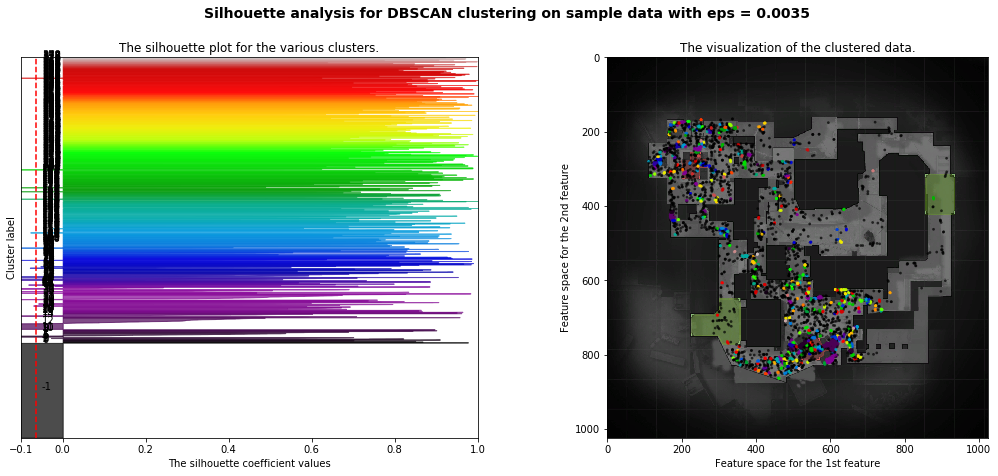

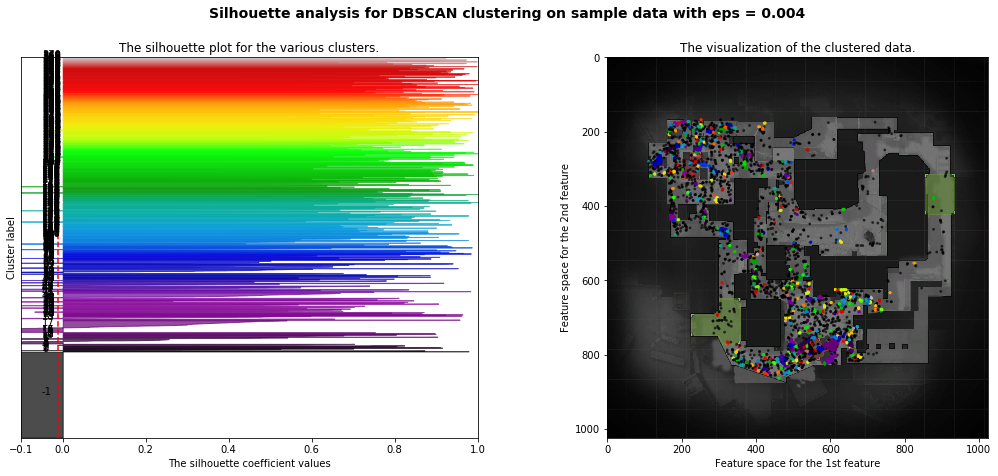

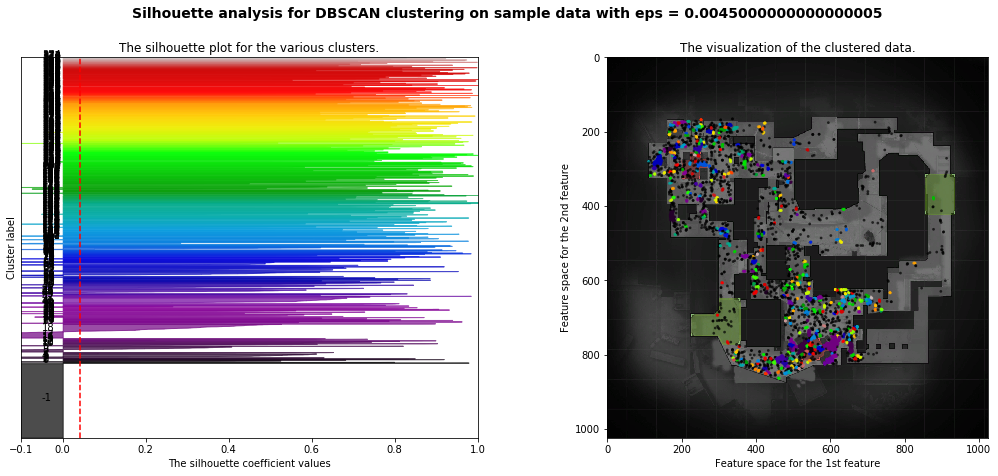

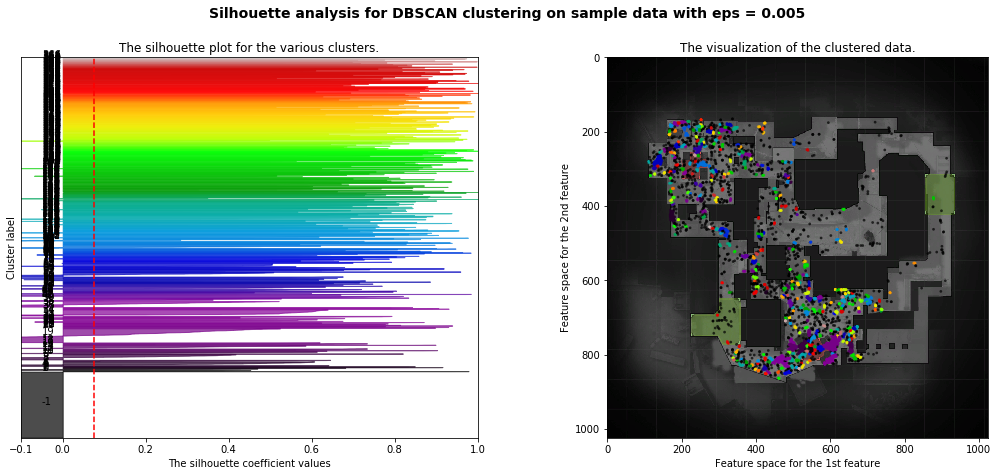

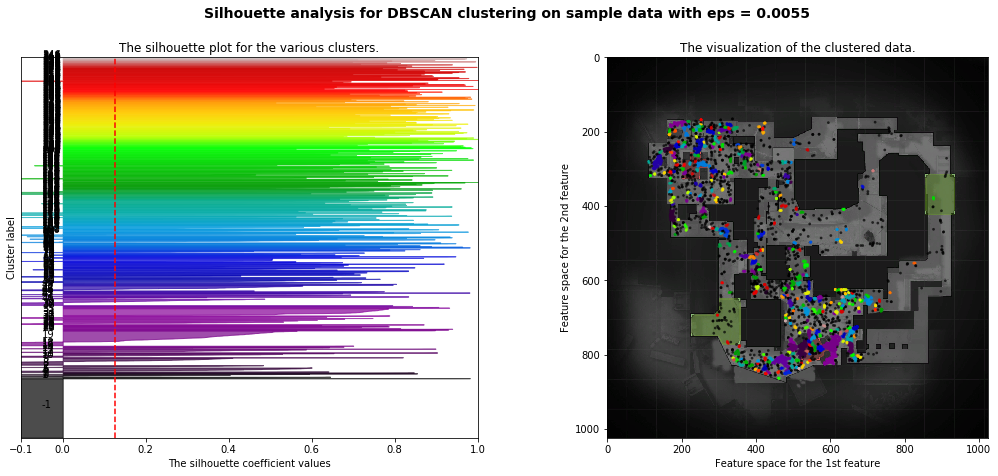

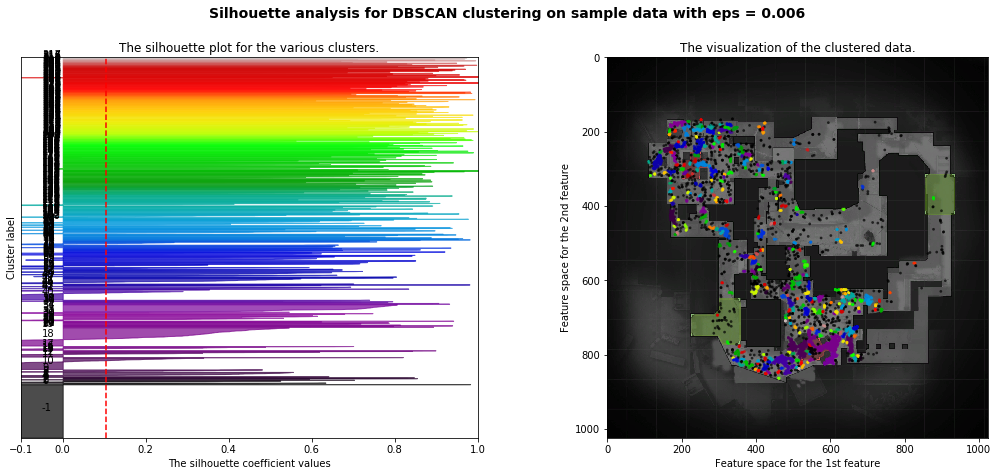

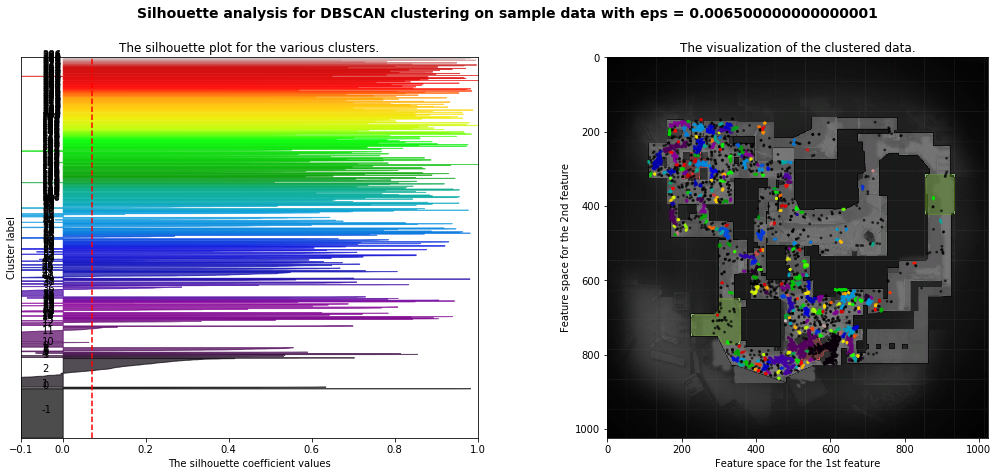

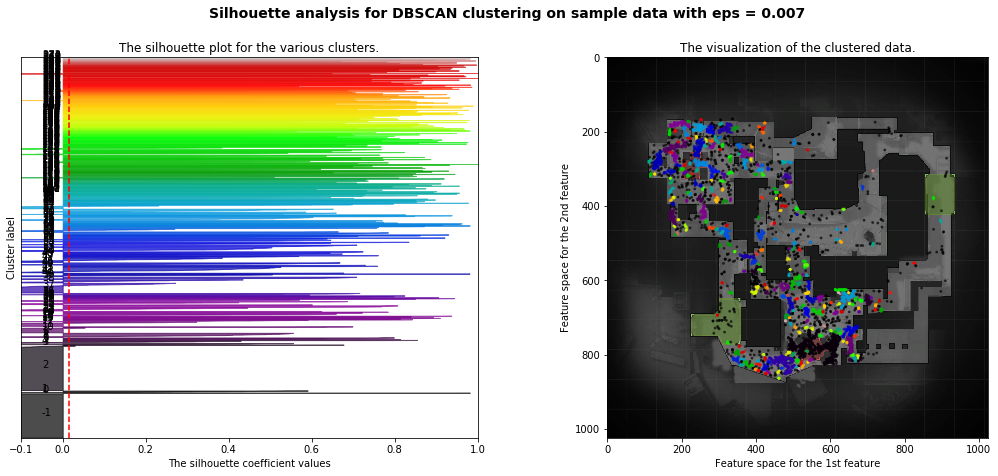

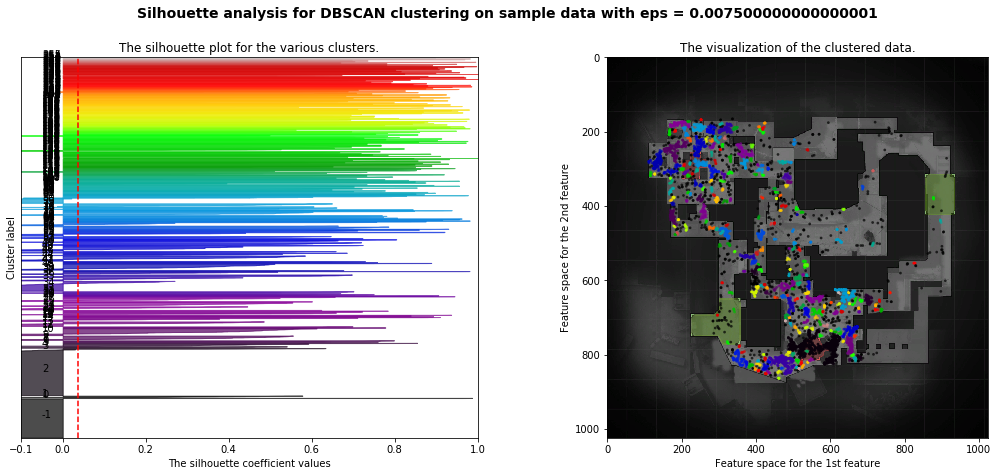

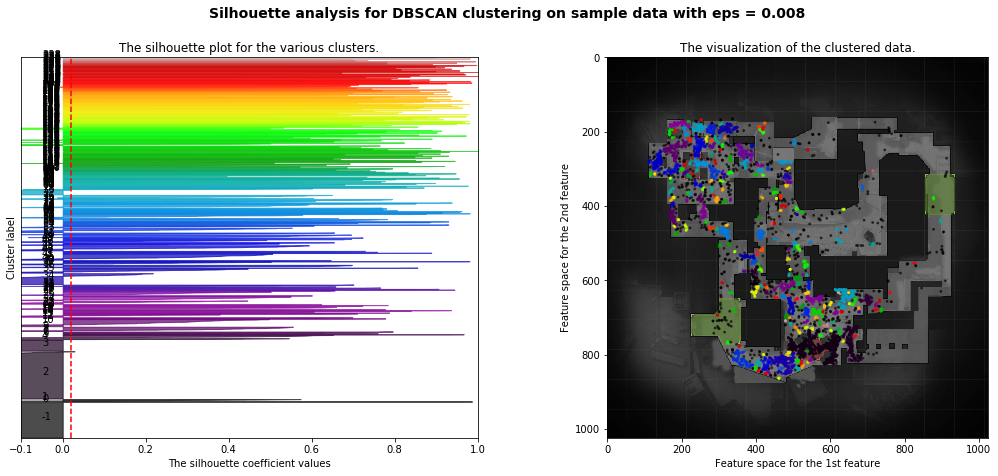

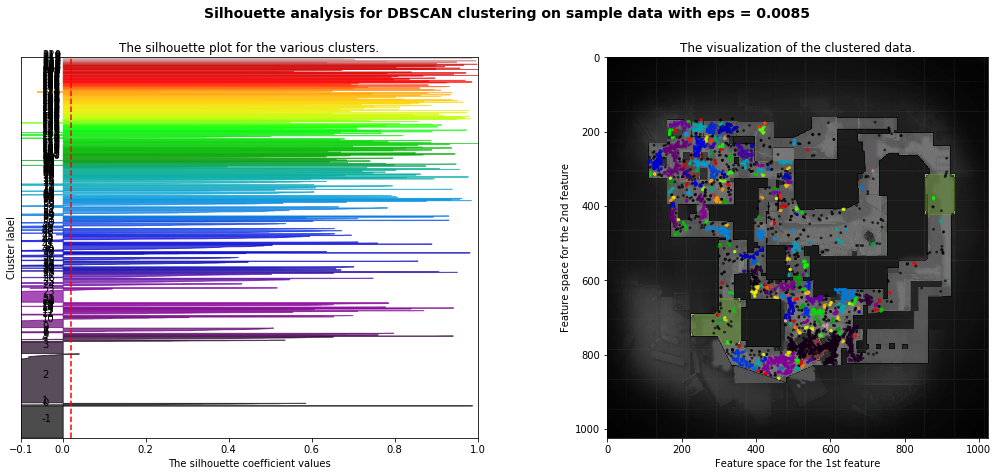

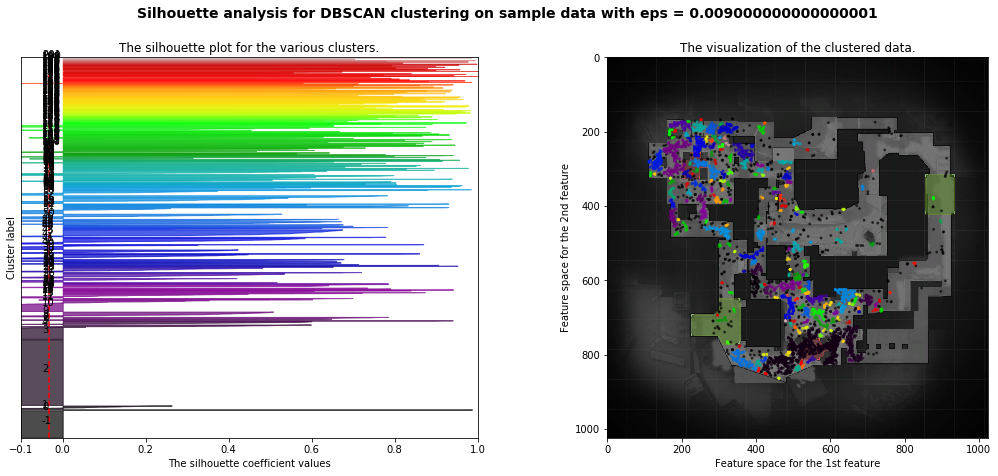

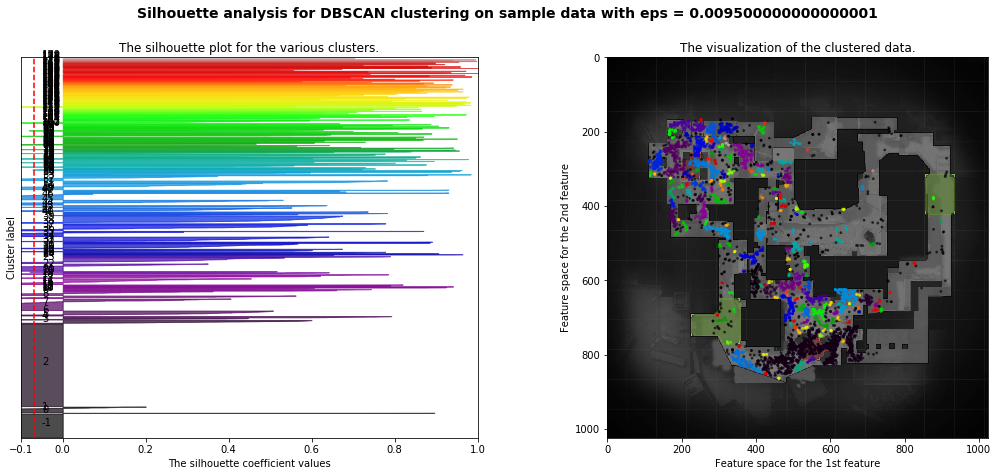

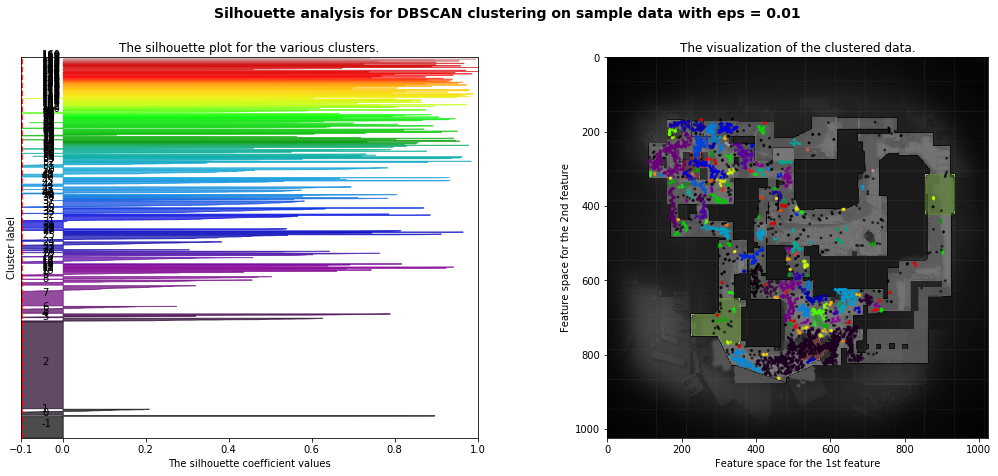

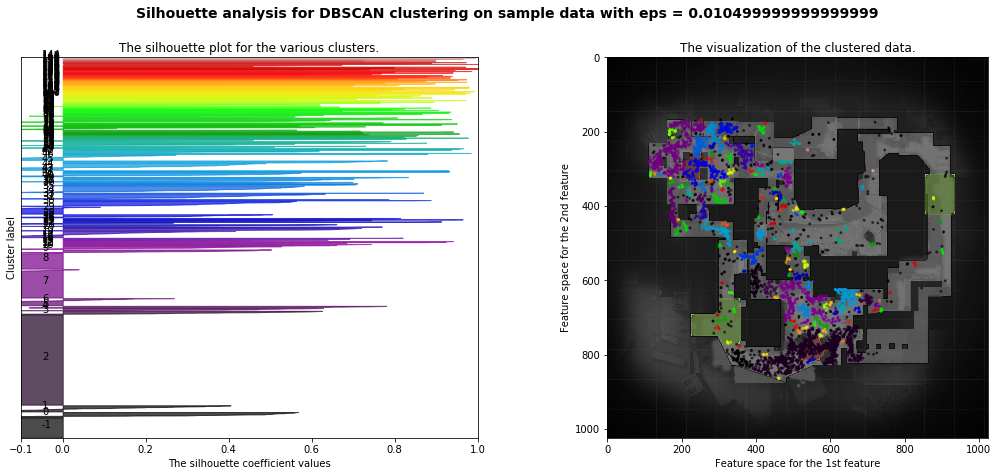

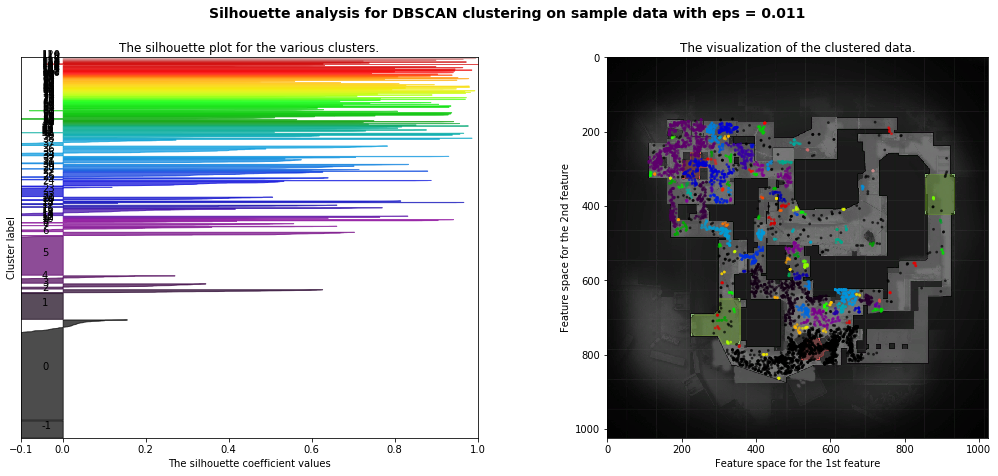

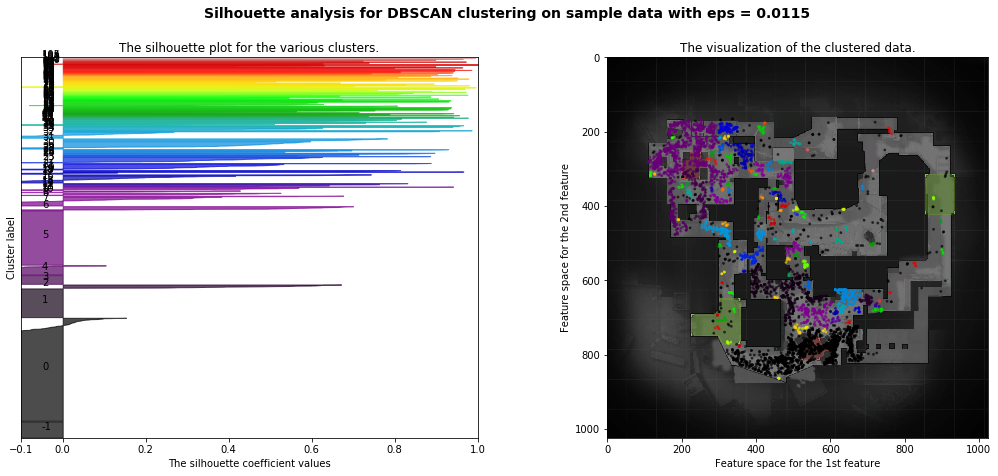

In [78]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.neighbors.nearest_centroid import NearestCentroid
import matplotlib.cm as cm

range_eps = np.arange(0.003, 0.012, 0.0005)

pos_type_of_interest = 'DMG_VIC'
map_of_interest = 'de_mirage'
team_of_interest = 'CounterTerrorist'
X = cluster_df[cluster_df['pos_type'] == pos_type_of_interest]
X = X[X['map'] == map_of_interest]
X = X[X['att_side'] == team_of_interest]
X = X[['pos_x', 'pos_y']].values
min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)

map_im = im = plt.imread(f'../data/{map_of_interest}.png')

score_df = pd.DataFrame(columns=['eps', 'avg_score', 'avg_score_without_cluster'])

for eps in range_eps:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = DBSCAN(eps=eps, min_samples=4)
    cluster_labels = clusterer.fit_predict(X)
    #(unique, counts) = np.unique(cluster_labels, return_counts=True)
    #print("Number in each cluster: ", np.asarray((unique, counts)).T)
    n_clusters = len(np.unique(cluster_labels))

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    silhouette_avg = silhouette_score(X, cluster_labels)
    avg = np.mean(sample_silhouette_values[cluster_labels.astype('int') != -1])
    print("For eps =", eps,
          "The average silhouette_score is :", silhouette_avg)
    print("Average silhouette score without cluster -1 is: ", avg)
    score_df = score_df.append({'eps': eps, 'avg_score': silhouette_avg, 'avg_score_without_cluster': avg}, ignore_index=True)

    
    y_lower = 10
    for i in np.unique(cluster_labels):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    X_og = min_max_scaler.inverse_transform(X)
    ax2.imshow(map_im)
    ax2.scatter(X_og[:, 0], X_og[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    draw_centers = False
    if draw_centers:
        # Labeling the clusters
        centroids = NearestCentroid()
        centroids.fit(X_og, cluster_labels.astype('int'))    
        centers = centroids.centroids_
        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=0.5, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                        s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle((f"Silhouette analysis for DBSCAN clustering on sample data with eps = {eps}"),
                 fontsize=14, fontweight='bold')

plt.show()

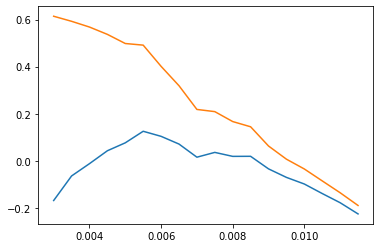

In [80]:
plt.plot(score_df['eps'], score_df['avg_score'])
plt.plot(score_df['eps'], score_df['avg_score_without_cluster'])
plt.show()

In [13]:
i_clustered = 0
for name, group in cluster_df.groupby(['file_round', 'firefight_cluster']):
    if name[1] == -1:
        continue
    if (group['pos_cluster'] == -1).any():
        continue
    i_clustered += 1
print(i_clustered)


      winner_side          att_side        map  seconds       pos_x  \
19451   Terrorist  CounterTerrorist  de_mirage   40.055  220.660321   
19452   Terrorist  CounterTerrorist  de_mirage   40.055  220.660321   
19453   Terrorist  CounterTerrorist  de_mirage   40.055  220.660321   
19454   Terrorist  CounterTerrorist  de_mirage   40.055  220.660321   
19455   Terrorist  CounterTerrorist  de_mirage   40.055  220.660321   
19456   Terrorist  CounterTerrorist  de_mirage   40.055  220.660321   
19457   Terrorist  CounterTerrorist  de_mirage   40.055  220.660321   

           pos_y  hp_dmg    pos_type  index                  file_round  \
19451  229.38013       0  Incendiary  19846  esea_match_13779852.dem_18   
19452  229.38013       0  Incendiary  19847  esea_match_13779852.dem_18   
19453  229.38013       0  Incendiary  19848  esea_match_13779852.dem_18   
19454  229.38013       0  Incendiary  19849  esea_match_13779852.dem_18   
19455  229.38013       0  Incendiary  19850  esea_match_